In [1]:
import pandas as pd

## 데이터 불러오기

In [3]:
file_path1 = './1. 전기차/지역별_전기차_구매보조금.csv'

df_sub = pd.read_csv(file_path1, encoding = 'euc-kr')
df_sub

,시도,지역구분,접수방법,민간공고대수,접수대수,출고대수,출고잔여대수,최대 보조금(만원)/승용,최대 보조금(만원)/초소형,최대 보조금(만원)/화물,최대 보조금(만원)/버스,비고
0,서울,서울특별시,출고등록순,3944,3944.0,3944,0,1700.0,750.0,1650.0,NaN,"예산소진으로 2018년 전기차 보조금 사업 마감o`18년 보급현황 : 3,944대(..."
1,부산,부산광역시,촐고등록순,561,561.0,561,0,1700.0,656.0,2500.0,NaN,○ 100대는 부산 청춘 드림카 우선지원(주관: 일자리경제정책과) ○ 접수현황:56...
2,대구,대구광역시,출고등록순,4206,4733.0,4432,-226,1800.0,850.0,1750.0,NaN,"※2018년 전기자동차 보급 계획대수 : 4,206대(전기택시, 초소형 포함) ○접..."
3,인천,인천광역시,선착순,578,721.0,578,0,1800.0,650.0,NaN,NaN,○선정현황 : 578대 -승용: 556대 -초소형: 22대 ○출고현황 : 578대 ...
4,광주,광주광역시,출고등록순,536,536.0,536,0,1900.0,700.0,NaN,NaN,ㅇ 접수현황(536대) - 승용 : 517대 - 초소형 : 19대(사업마감)ㅇ집행현...
...,...,...,...,...,...,...,...,...,...,...,...,...
164,경남,함양군,선착순 또는 초과시추첨,3,3.0,2,1,1800.0,NaN,NaN,NaN,NaN
165,경남,거창군,선착순 또는 초과시추첨,8,8.0,8,0,1800.0,NaN,NaN,NaN,NaN
166,경남,합천군,선착순,6,6.0,6,0,2000.0,NaN,NaN,NaN,NaN
167,제주,제주시,출고등록순,4702,6701.0,5727,-1025,1800.0,700.0,1800.0,NaN,NaN


## 데이터 확인 및 결측치 처리

In [6]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시도              169 non-null    object 
 1   지역구분            169 non-null    object 
 2   접수방법            166 non-null    object 
 3   민간공고대수          169 non-null    int64  
 4   접수대수            167 non-null    float64
 5   출고대수            169 non-null    int64  
 6   출고잔여대수          169 non-null    int64  
 7   최대 보조금(만원)/승용   163 non-null    float64
 8   최대 보조금(만원)/초소형  108 non-null    float64
 9   최대 보조금(만원)/화물   31 non-null     float64
 10  최대 보조금(만원)/버스   0 non-null      float64
 11  비고              63 non-null     object 
dtypes: float64(5), int64(3), object(4)
memory usage: 16.0+ KB


In [8]:
# 결측치의 경우 접수 및 출고, 보조금이 없는 것으로 확인되어 0으로 처리
df_sub = df_sub.fillna(0)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시도              169 non-null    object 
 1   지역구분            169 non-null    object 
 2   접수방법            169 non-null    object 
 3   민간공고대수          169 non-null    int64  
 4   접수대수            169 non-null    float64
 5   출고대수            169 non-null    int64  
 6   출고잔여대수          169 non-null    int64  
 7   최대 보조금(만원)/승용   169 non-null    float64
 8   최대 보조금(만원)/초소형  169 non-null    float64
 9   최대 보조금(만원)/화물   169 non-null    float64
 10  최대 보조금(만원)/버스   169 non-null    float64
 11  비고              169 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 16.0+ KB


## 전체차량에 대한 구매보조금 평균 계산

In [56]:
df_sub['최대 보조금(만원)/전체평균_버스제외'] = (df_sub['최대 보조금(만원)/승용']+df_sub['최대 보조금(만원)/초소형']+df_sub['최대 보조금(만원)/화물'])/3
df_sub['최대 보조금(만원)/전체평균_버스제외']

0      1366.666667
1      1618.666667
2      1466.666667
3       816.666667
4       866.666667
          ...     
164     600.000000
165     600.000000
166     666.666667
167    1433.333333
168    1216.666667
Name: 최대 보조금(만원)/전체평균_버스제외, Length: 169, dtype: float64

### 시각화1

In [57]:
pivot_sido_sub = df_sub.pivot_table(values = ['최대 보조금(만원)/승용','최대 보조금(만원)/초소형','최대 보조금(만원)/화물','최대 보조금(만원)/전체평균_버스제외',],
                             index = '시도',
                             aggfunc = 'mean')
pivot_sido_sub = pivot_sido_sub.fillna(0)
pivot_sido_sub

,최대 보조금(만원)/승용,최대 보조금(만원)/전체평균_버스제외,최대 보조금(만원)/초소형,최대 보조금(만원)/화물
시도,,,,
강원,1646.666667,640.370370,274.444444,0.000000
경기,1647.580645,920.752688,563.064516,551.612903
경남,1690.476190,716.015873,371.857143,85.714286
경북,1752.083333,879.166667,531.250000,354.166667
광주,1900.000000,866.666667,700.000000,0.000000
대구,1800.000000,1466.666667,850.000000,1750.000000
대전,1900.000000,1483.333333,750.000000,1800.000000
부산,1700.000000,1618.666667,656.000000,2500.000000
서울,1700.000000,1366.666667,750.000000,1650.000000


In [21]:
import matplotlib.pyplot as plt

In [41]:
a = []
for i in range(len(df_sub['시도'].unique())) :
    a.append(df_sub['시도'].unique()[i])
    
a.sort()
a

['강원',
 '경기',
 '경남',
 '경북',
 '광주',
 '대구',
 '대전',
 '부산',
 '서울',
 '세종',
 '울산',
 '인천',
 '전국',
 '전남',
 '전북',
 '제주',
 '충남',
 '충북']

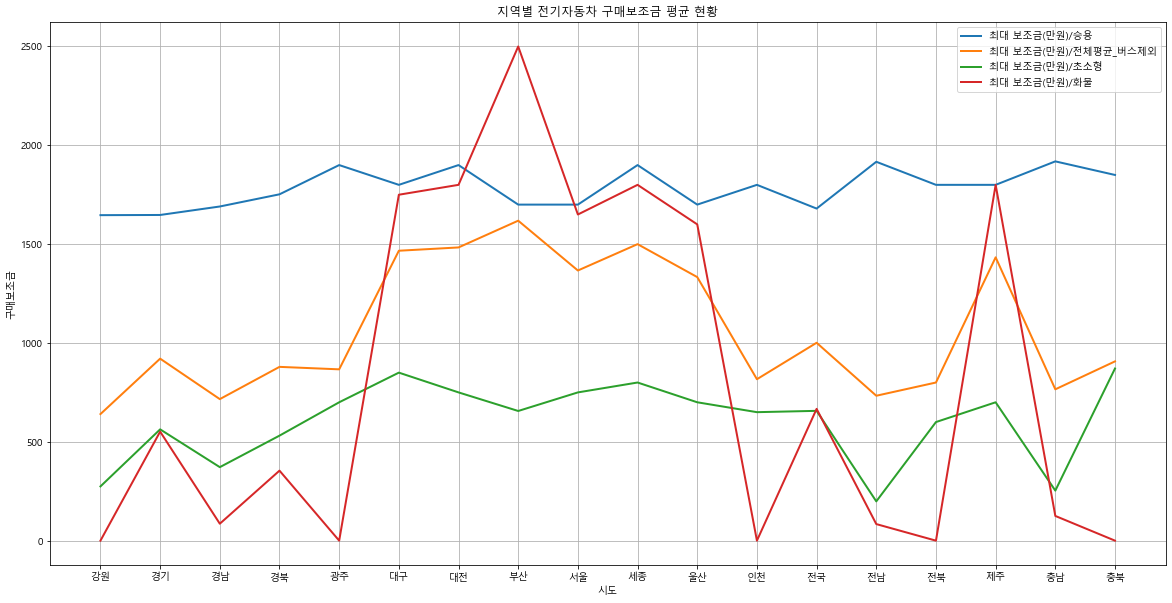

In [63]:
plt.rcParams['figure.figsize'] = (20,10)

plt.rcParams['lines.linewidth'] = 2

plt.rc('font', family = 'Malgun Gothic', size = 10)

pivot_sido_sub.plot()

plt.title('지역별 전기자동차 구매보조금 평균 현황')
plt.ylabel('구매보조금')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],a)

plt.legend(loc='upper right')

plt.grid(True)

plt.show()

In [ ]:
'''
시도별 구매보조금 평균 현황을 확인해본 결과, 화물차량 구매보조금이 전체(승용,초소형,화물) 평균값에 영향을 미치는 것으로 보인다.
이에 화물차량을 제외한 승용,초소형차에 대한 평균치만 계산하여 다시 확인해보기로 한다.
'''

## 승용, 초소형 차량에 대한 구매보조금 평균 계산

In [61]:
df_sub['최대 보조금(만원)/승용_초소형평균'] = (df_sub['최대 보조금(만원)/승용']+df_sub['최대 보조금(만원)/초소형'])/2
df_sub['최대 보조금(만원)/승용_초소형평균']

0      1225.0
1      1178.0
2      1325.0
3      1225.0
4      1300.0
        ...  
164     900.0
165     900.0
166    1000.0
167    1250.0
168     825.0
Name: 최대 보조금(만원)/승용_초소형평균, Length: 169, dtype: float64

### 시각화2

In [64]:
pivot_sido_sub2 = df_sub.pivot_table(values = ['최대 보조금(만원)/승용','최대 보조금(만원)/초소형','최대 보조금(만원)/승용_초소형평균'],
                             index = '시도',
                             aggfunc = 'mean')
pivot_sido_sub2 = pivot_sido_sub2.fillna(0)
pivot_sido_sub2

,최대 보조금(만원)/승용,최대 보조금(만원)/승용_초소형평균,최대 보조금(만원)/초소형
시도,,,
강원,1646.666667,960.555556,274.444444
경기,1647.580645,1105.322581,563.064516
경남,1690.476190,1031.166667,371.857143
경북,1752.083333,1141.666667,531.250000
광주,1900.000000,1300.000000,700.000000
대구,1800.000000,1325.000000,850.000000
대전,1900.000000,1325.000000,750.000000
부산,1700.000000,1178.000000,656.000000
서울,1700.000000,1225.000000,750.000000


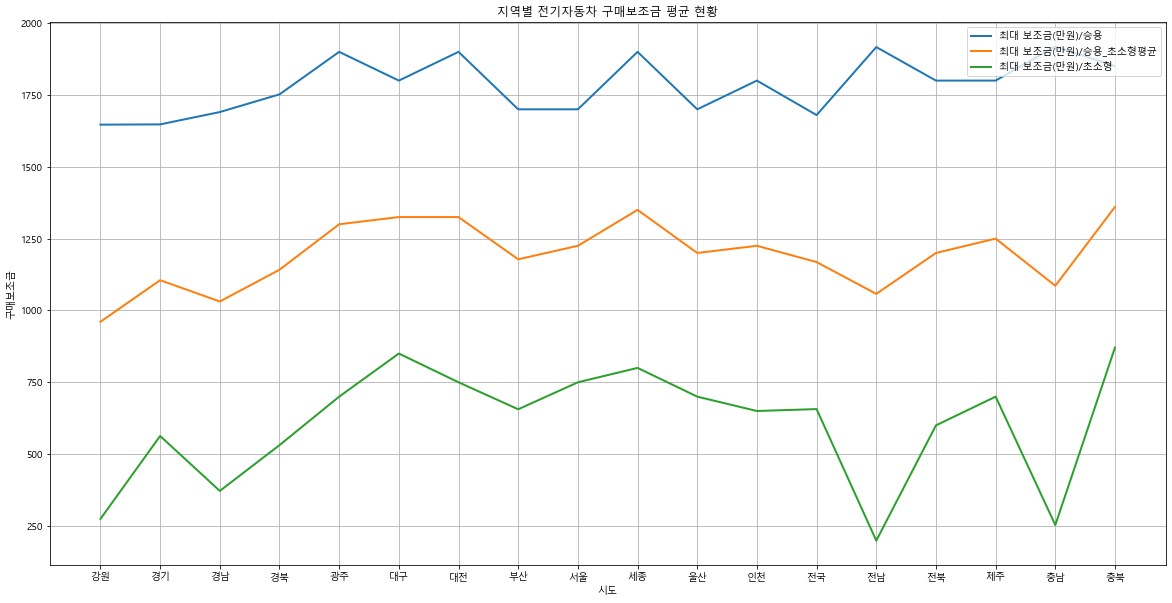

In [65]:
plt.rcParams['figure.figsize'] = (20,10)

plt.rcParams['lines.linewidth'] = 2

plt.rc('font', family = 'Malgun Gothic', size = 10)

pivot_sido_sub2.plot()

plt.title('지역별 전기자동차 구매보조금 평균 현황')
plt.ylabel('구매보조금')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],a)

plt.legend(loc='upper right')

plt.grid(True)

plt.show()

In [ ]:
'''
승용, 초소형 차량 구매보조금 전체 평균을 확인해본 결과,
세종, 충북, 대전, 대구, 광주의 평균 보조금이 높은 것으로 확인되었다.

또한, 승용 차량의 구매보조금이 초소형 차량 구매보조금보다 매우 높은 것으로 나타났다.
'''